In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.plotting as plot 
import functions.data_wrangling as data 
import functions.aos_functions as aos

In [2]:
# import dataset
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_ep-both.nc',
                            parallel=True, chunks={'time': 31})
ds

<xarray.Dataset>
Dimensions:  (time: 21550, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1_pr  (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1_qg  (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>

# Seasonal Eddy Feedback Parameter

### Winter EFP

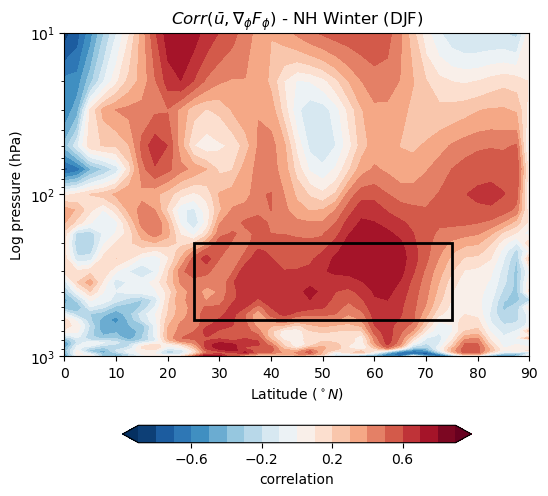

In [3]:
plot.plot_reanalysis_correlation(ds, season='djf', label='NH Winter (DJF)') 

### Spring EFP

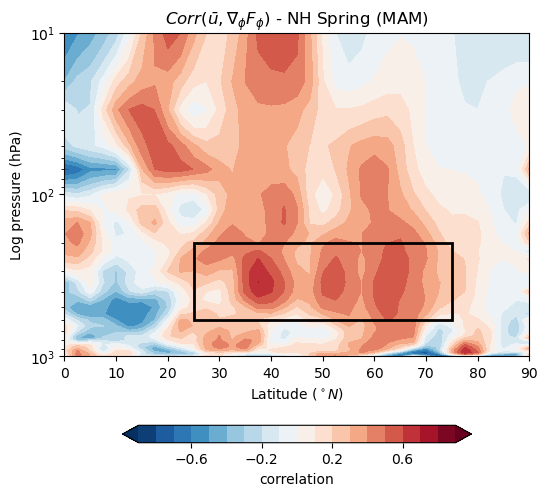

In [4]:
plot.plot_reanalysis_correlation(ds, season='mam', label='NH Spring (MAM)')

### Summer EFP

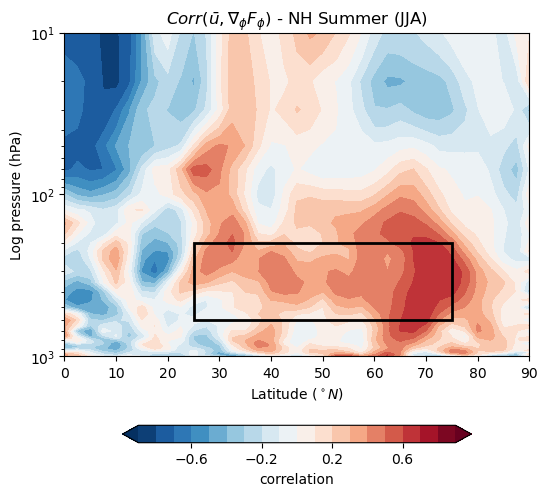

In [5]:
plot.plot_reanalysis_correlation(ds, season='jja', label='NH Summer (JJA)')

### Autumn EFP

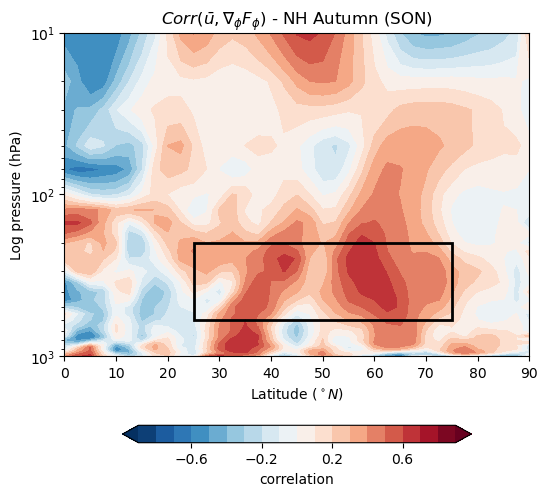

In [6]:
plot.plot_reanalysis_correlation(ds, season='son', label='NH Autumn (SON)')

# Southern Hemisphere

### SH winter (JJA) EFP

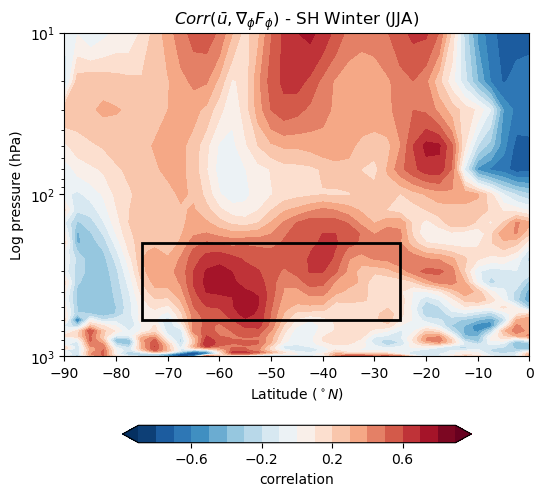

In [7]:
plot.plot_reanalysis_correlation(ds, latitude='SH', season='jja', label='SH Winter (JJA)')

### SH spring (SON) EFP

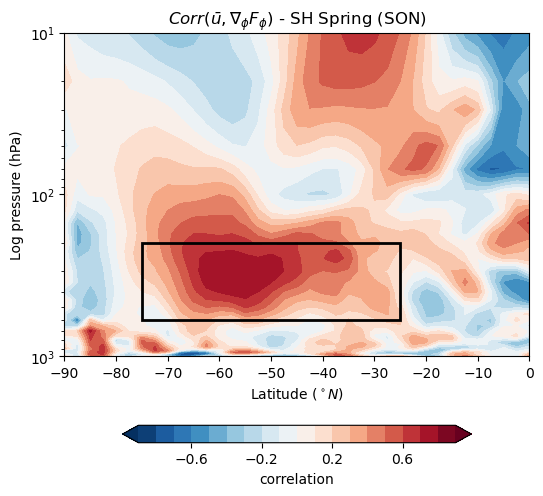

In [8]:
plot.plot_reanalysis_correlation(ds, latitude='SH', season='son', label='SH Spring (SON)')

### SH summer (DJF) EFP

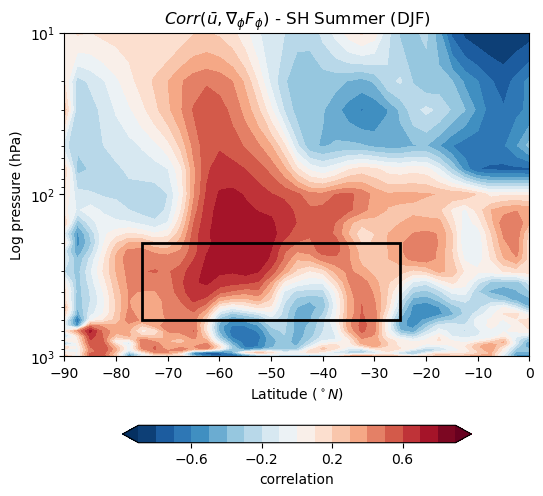

In [9]:
plot.plot_reanalysis_correlation(ds, latitude='SH', season='djf', label='SH Summer (DJF)')

### SH autumn (MAM) EFP

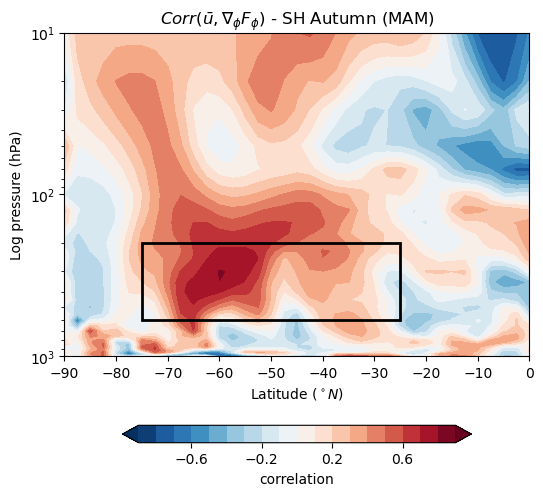

In [10]:
plot.plot_reanalysis_correlation(ds, latitude='SH', season='mam', label='SH Autumn (MAM)')

# Average over multiple reanalysis

In [22]:
ds1 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

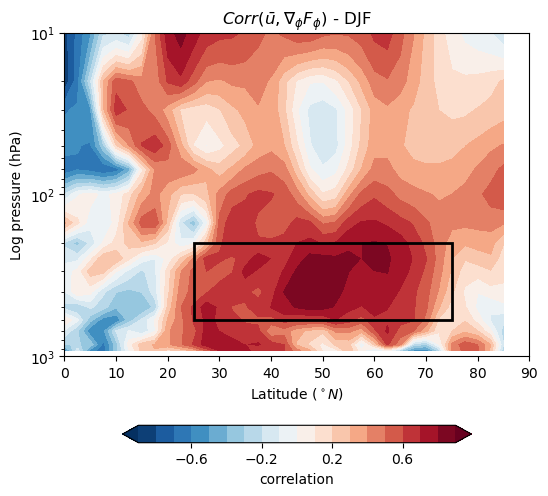

In [23]:
plot.plot_reanalysis_correlation(ds1, check_variables=True)

In [24]:
ds1 = data.seasonal_mean(ds1, season='djf')
ds2 = data.seasonal_mean(ds2, season='djf')
ds3 = data.seasonal_mean(ds3, season='djf')

corr1 = xr.corr(ds1.div1_pr, ds1.ubar, dim='time')
corr2 = xr.corr(ds2.div1_pr, ds2.ubar, dim='time')
corr3 = xr.corr(ds3.div1_pr, ds3.ubar, dim='time')

In [25]:
corr = ( corr1.fillna(0) + corr2.fillna(0) + corr3.fillna(0) ) / 3

In [26]:
corr = corr.sel(pressure=slice(1000,10))

corr_NH = corr.sel(latitude=slice(0,90))
corr_SH = corr.sel(latitude=slice(-90,0))

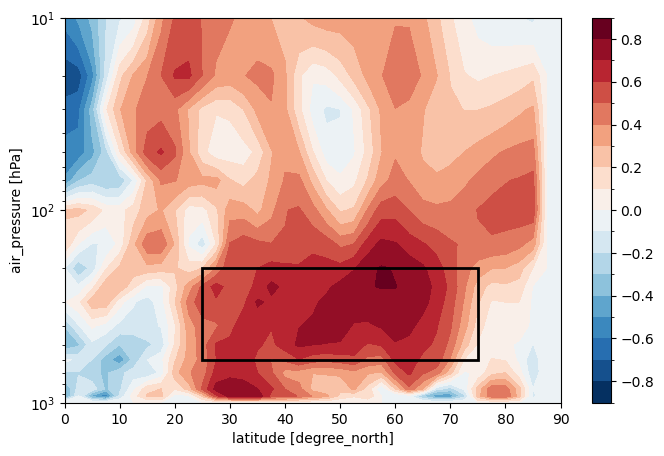

In [30]:
corr_NH.plot.contourf(yincrease=False, levels=20, yscale='log', figsize=(8,5))

import matplotlib.patches as patches
rect = patches.Rectangle((25, 600), 50, -400, 
                    fill=False, linewidth=2)
plt.gca().add_patch(rect)